In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Data visualisation avec Seaborn</font>")

# Introduction to Data Visualisation with Seaborn

## What you'll learn in this course

Running labs is good. Being able to explain them to newbies is better. That's the whole point of data visualization. There are a lot of tools like Tableau, Power BI, ClickView but also libraries like Seaborn for Python. It is important to be able to make visualizations with code. Today we will learn how to use Seaborn. You will learn how to :

* Visualize statistics
* View categorical variables
* View a distribution of a sample
* Visualize linear relationships
* Create heatmaps

<font color='blues'>**Les graphiques permettent de développer une intuition des données que l'on étudie !**</font>

## Why Seaborn?

<font color='blues'>**Parceque les graphiques sont, à la fois, plus esthétiques et plus simples à construire !**</font>

## What's Seaborn ?

There is a Data Visualization library called Matplotlib. It was used a lot but since then, a new library built on Matplotlib has arrived in the race : Seaborn. This one allows you to have more aesthetic visualizations and easier to set up.


### Seaborn installation

Normally, Seaborn is already installed on our machines but, just in case, go to your terminal and enter:


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from simple_chalk import green, red, blue, greenBright

# Univariate visualization


## Qualitative variables

A frequency table for a qualitative variable can be produced very easily with the command:

In [4]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    "A": [1,2,3,4, 4, 4]
})

pd.value_counts(df["A"])

4    3
3    1
2    1
1    1
Name: A, dtype: int64

In order to graphically visualize the frequency table of the different modalities of a qualitative explanatory variable, you can use the following command:

In [5]:
#sns.countplot(df['A'])

<AxesSubplot:xlabel='A', ylabel='count'>

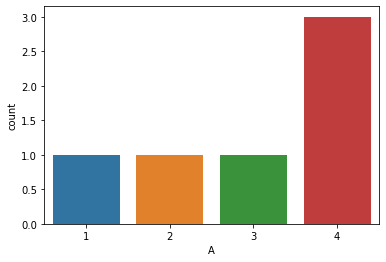

In [6]:
import seaborn as sns
sns.countplot(data=df, x='A')

**Tip:**

You will see ```;``` after each Seaborn method, goal of that is to remove the sentence like: ```<AxesSubplot:xlabel='A', ylabel='count'>```

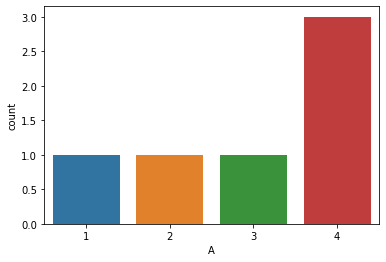

In [7]:
sns.countplot(data=df, x='A');

<font color='blus'>**Tip :**</font>

> Il est aussi possible de récupérer la sortie de la fonction `seaborn` dans la variable `ax`: 

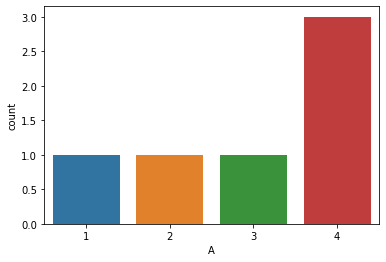

In [8]:
ax = sns.countplot(data=df, x='A')

## Quantitative variables

We have seen how the visualization of a distribution for categorical variables is done, but it would also be good to know how to visualize the distribution of quantitative variables.

This time we can do this with the `distplot()` function.

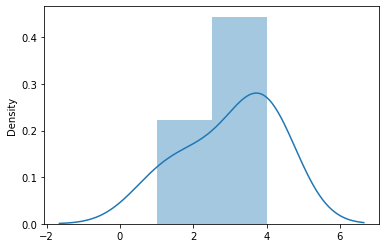

In [9]:
sns.distplot(df);

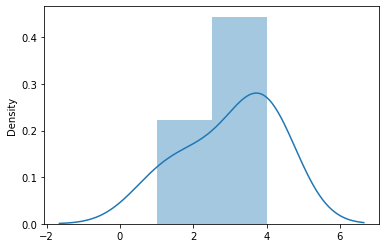

In [10]:
sns.distplot(df, hist=True, kde=True);

## Box plot for a quantitative variable

It is possible to visualize a moustache box for a quantitative variable with the following command:

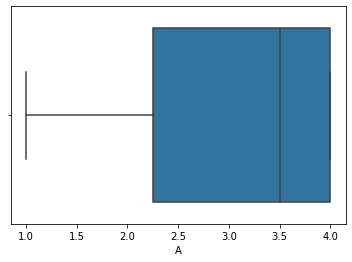

In [11]:
sns.boxplot(df["A"]);

In [12]:
df["A"].describe()

count    6.000000
mean     3.000000
std      1.264911
min      1.000000
25%      2.250000
50%      3.500000
75%      4.000000
max      4.000000
Name: A, dtype: float64

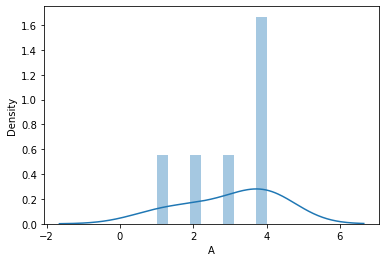

In [15]:
sns.distplot(df["A"], bins=10);

## Univariate distribution

For this demonstration, we are going to use the titanic dataset with the classical libraries

In [11]:
import seaborn as sns
import matplotlib as plt
import pandas as pd

# load Dataset
titanic = sns.load_dataset("titanic")

<font color='blus'>**Détection des valeurs manquantes**</font>

In [12]:
ser_nan = titanic.age.isna()
display(ser_nan)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: age, Length: 891, dtype: bool

In [13]:
ser_nan.value_counts()

False    714
True     177
Name: age, dtype: int64

<font color='blus'>**Purge des valeurs manquantes**</font>

In [14]:
display(titanic.shape)
titanic['age'].dropna(axis='index', inplace=True)
display(titanic.shape)


(891, 15)

(891, 15)

In [15]:
index_nan = titanic[ser_nan].index
display(index_nan)

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [16]:
titanic.loc[index_nan].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


<font color='blus'>**Les valeurs manquantes sont remplacées par la moyenne de la Series**</font>

In [17]:
# fill missing values
age = titanic.age.fillna(titanic.age.mean())

To visualize the age distribution in the Titanic, it can be done as follows:

> On estime une distribution de probabilité par une méthode de noyau.
>
> Sur un histogramme, on fait une estimation de la densité de probabilité d'une valeur $x$. C'est le nombre d'observations qui se trouvent dans le pavé de largeur $h$ et centré sur cette valeur $x$.
>
> Cette estimation de la distribution de l'histogramme n'est pas continue.
>
> Pour rendre continue la distribution, la pavé centré sur $x$ est remplacé par une Gaussienne centrée sur $x$: 
>
### $$G(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp^{-\frac{(x-\mu)^ {2}}{2\sigma^{2}}}$$
>
> **Gaussienne** avec les paramètres $(\mu, \sigma) = (0,1)$.
>
> Le noyau est donc : 
### $$K(x) = \frac{1}{\sqrt{2\pi}} \exp^{-\frac{x^ {2}}{2}}$$
>
> La distribution globale est formée par la somme continue (une intégrale) de toutes les Gaussiennes centrées sur chacune des valeurs de $x$.
> 

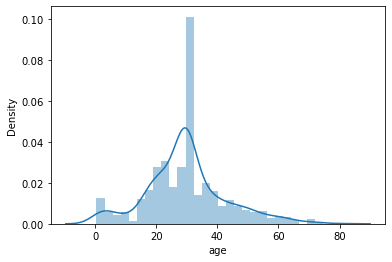

In [18]:
# displot 
sns.distplot(age);

You see here that we have the distribution with a bar chart and with a continuous line, which is called _Kernel Density Estimation_. We will explain this concept in the section just below.


In our graph, we obtained, by default, about 2 years per bar in the graph. However, this is not necessarily the best visualization. We can choose the number of bars (_bins_ in English) by specifying it in the parameters.

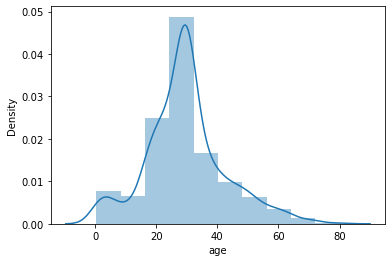

In [19]:
sns.distplot(age, bins = 10);

You can also choose to have only a histogram and not have the _Kernel Density Estimation_. This way we can see exactly how many observations there are.

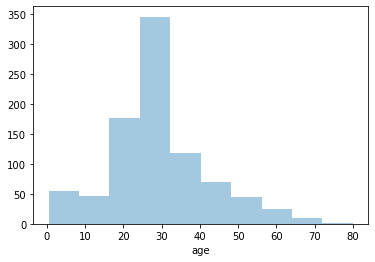

In [20]:
sns.distplot(age, kde=False, bins=10);

This can help us to have a simplified vision of the distribution of our dataset.

### Intuitive approach of Kernel Density Estimation

We have seen above how to visualize the _Kernel Density Estimation_. Intuitively, this corresponds to the probability that one of the elements in your sample falls into one of the bars of your histogram.

It is calculated by taking the average of the distances of values that are close to each other. The smaller the distance between the values, the greater the estimated probability.

Hence, for example, there is a higher probability of people in Titanic who are close to 35 years old, since the majority of the passengers were that age.


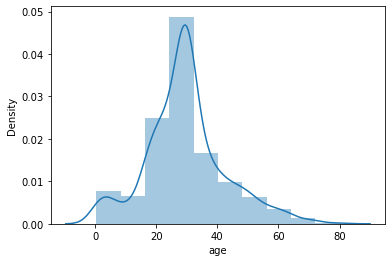

In [21]:
sns.distplot(age, kde=True, bins=10);

# Bivaried visualisation

Bivariate visualizations allow us to understand the joint behaviour of two variables and the relationships between them. For this purpose, several types of graphical representations are possible.


## Scatter plot visualisation


### Preparation

Let's begin with the represenation in scatterplot. We need these librairies:

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Utilisons le Dataset suivant :

In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Visualise two dimensions on a scatter plot

Let's create our first point cloud with Seaborn. The easiest way is to enter the following command:


>**Tip:**
>> Le radical *rel* dans `relplot` pour *relation*; 
>>
>> Le graphique permet d'analyser visuellement des relations entre plusieurs variables.

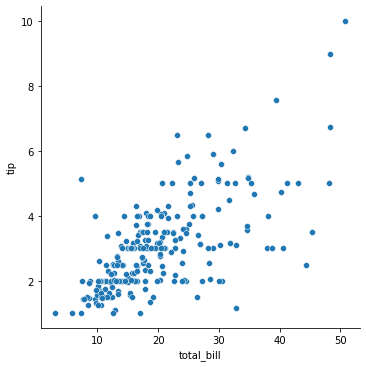

In [24]:
sns.relplot(x="total_bill", y="tip", data = tips);

This is the result. We are seeing a correlation, a rather linear correlation, between the amount of the bill and the amount of the tip. In other words, the more expensive the bill, the bigger the tip.

#### Visualise more than two dimensions on a scatter plot

Dimensions can be added to a graph, while keeping two axes. This can be done by adding colors or point sizes. It will be difficult to go beyond four dimensions, however.


##### Three dimensions

Let's see how many smokers are in our dataset. We can add a parameter in our _relplot()_ function which is _hue_.

In [25]:
tips[["total_bill", "tip", "smoker"]].head()

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No


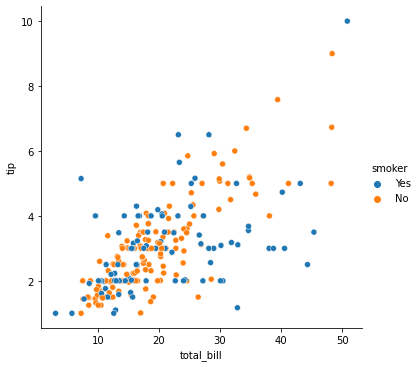

In [26]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

As can be seen on this graph, we have added a third dimension by changing the colour of the dots in the graph, depending on the smoker/non-smoker characteristic.

##### Fourth dimension

We can also add a parameter to our function which is the size (_size)_. For example, in our restaurant, we would like to know the number of people per table according to the other variables. This is how we can do it:


In [27]:
tips[["total_bill", "tip", "smoker", "size"]].head()

,total_bill,tip,smoker,size
0,16.99,1.01,No,2
1,10.34,1.66,No,3
2,21.01,3.50,No,3
3,23.68,3.31,No,2
4,24.59,3.61,No,4


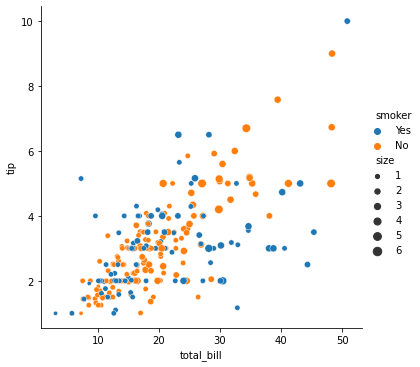

In [28]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="size" ,data=tips);

Here we have added another variable which is the number of people per table. Here, the bigger the dot, the more people on the table.


##### Cinq dimensions

We could possibly add a fifth dimension to our graph by changing the style of the dots. For example, some stitches can be circles, others can be crosses. It is therefore possible to add a fifth parameter:


In [29]:
tips[["total_bill", "tip", "smoker", "size", "time"]].head()

,total_bill,tip,smoker,size,time
0,16.99,1.01,No,2,Dinner
1,10.34,1.66,No,3,Dinner
2,21.01,3.50,No,3,Dinner
3,23.68,3.31,No,2,Dinner
4,24.59,3.61,No,4,Dinner


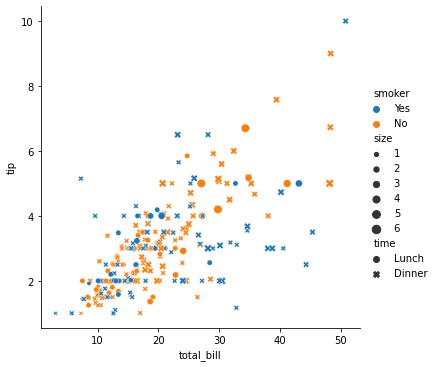

In [30]:
sns.relplot(x="total_bill", y="tip", hue="smoker", size="size", style ="time", data=tips);

_Style_ will allow you to change the style of the points in your cloud. Here you can determine on the graph: smokers, the number of people at the table, whether it was for lunch or dinner, and the amount of the tip in relation to the bill.


However, that's a lot of variables to deal with all at once and the graph loses its clarity. As a general rule of thumb, always try to keep only three variables in a graph if you have to present it to someone.


## Visualization of continuous relationships

After the point cloud, let's look at ongoing relationships. As a reminder, continuous relationships can be seen as continuous quantitative statistics. For example, salary is a continuous variable.


### Simple continuous visualization

Let's create a dataset of random values:

In [31]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df.head(), df.shape

(   time     value
 0     0  0.817692
 1     1  0.772022
 2     2  1.886405
 3     3  1.102139
 4     4  0.668910,
 (500, 2))

Here we have a dataset with a time value (_time_) ranging from 0 to 500 and a value associated with the time variable _(value)_.

This dataset can be visualized as follows:

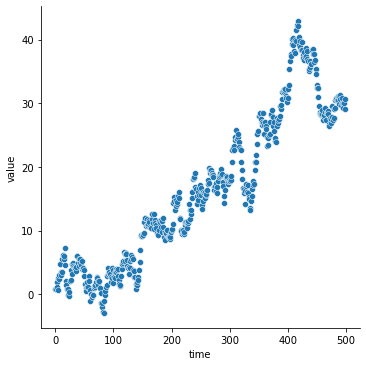

In [32]:
sns.relplot(x="time", y="value", data=df);

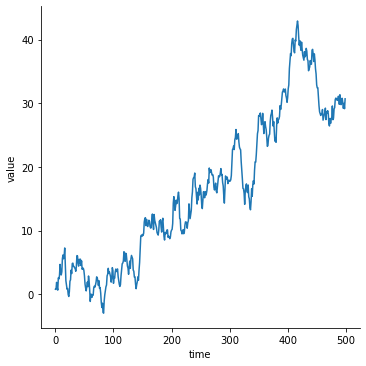

In [33]:
sns.relplot(x="time", y="value", kind="line", data=df);

As we are on random values, the graph could be different.

As you can see, the code is similar as the scatter plot. The difference is the parameter: ```kind``` wich is used to determine what kind of graph you need to show (here a line)

### See an estimate

Data visualisation can be used to create visual confidence intervals. Consider the following dataset:

In [34]:
irm = sns.load_dataset("fmri")
irm.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [35]:
irm[irm["timepoint"]==18].head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513


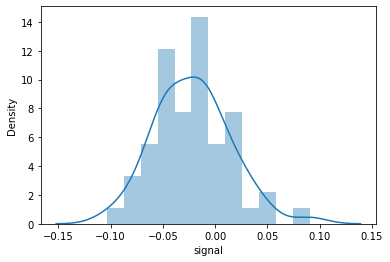

In [36]:
sns.distplot(irm[irm["timepoint"]==18]["signal"], bins=12);

This represents the MRI results of several patients. As you can see, there are several _timepoints_ at which we have performed an MRI for which we get a different signal. 

Seaborn will automatically create a 95% confidence interval that will represent the average of each _timepoint_. See on the graph:

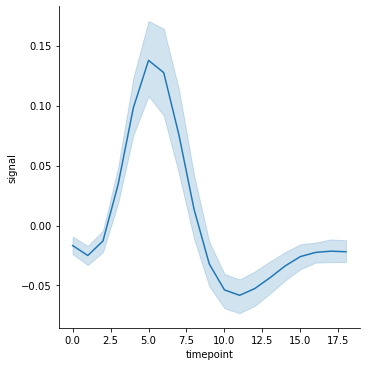

In [37]:
sns.relplot(x="timepoint", y="signal", kind="line", data=irm);

The navy blue line represents the mean by _timepoint_ and the transparent blue highlighting represents the 95% confidence interval.

## Add dimensions

In the same way as with point clouds, we can use the same arguments for our continuous functions.


In [38]:
display(irm.head())
display(irm.event.value_counts())
display(irm.region.value_counts())

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


cue     532
stim    532
Name: event, dtype: int64

parietal    532
frontal     532
Name: region, dtype: int64

> **stim : stimulation**
>
> **cue : signal**
>
> **parietal : pression a la paroi**
>
> **frontal : pression frontale**

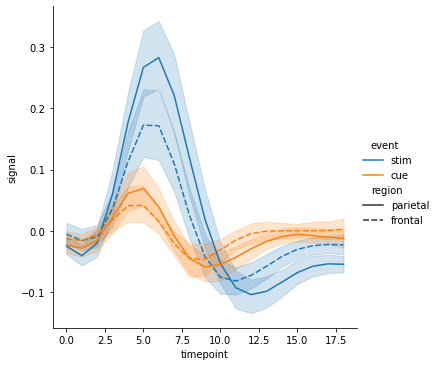

In [39]:
sns.relplot(x="timepoint", y="signal",
            kind="line", hue="event",
            style="region", data=irm);


# Bivariate visualization with categorical variables

Categorical variables are also interesting to visualize. Let's look at the main graphs we can make.


## Scatterplot by category

Above, we used the _relplot()_ function for all continuous relationships. For categorical variables, we use _catplot()._

For this part:


In [40]:
import seaborn as sns
import matplotlib as plt
tips = sns.load_dataset("tips")

### Create the graph

Let's create our first graphic:

>**Tip:**
>> Le radical *cat* dans `catplot` pour *catégorie*; 
>>
>> Le graphique permet d'analyser visuellement la répartition d'une caractéristique en fonction des variables catégorielles.

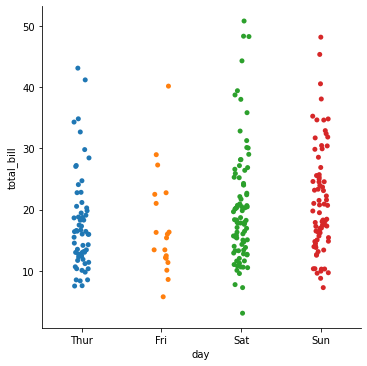

In [41]:
sns.catplot(x="day", y="total_bill", data=tips);

Here we have made a breakdown of the amounts of the bills by day of the week the restaurant is open. 

However, this visualization doesn't help us much because we don't really see the density of bills per day.

To remedy this, we can add an argument ```kind = "swarm"```:

> Avec l'option `swarm` les points qui représentent ici les pourboires, ne se chauvauchent pas.
> 
> Une fonction de transformation est appliquée pour positionner les points représentant les pourboires en fonction de leur valeur sans qu'ils ne se chevauchent.
>
> L'appréhension de la distribution des pourboires est sensée être facilitée.

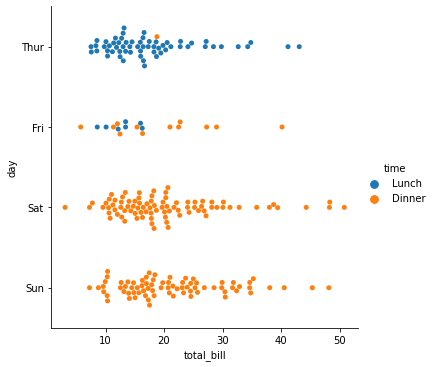

In [42]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

We can see the distribution of additions per day much more clearly with this argument.

NB: For the sake of clarity, we have changed the axes of our graph.

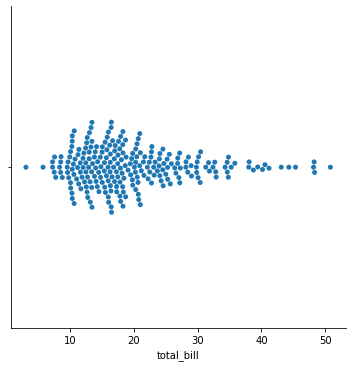

In [43]:
ax = sns.catplot(x="total_bill", kind="swarm", data=tips)

### Add categories

In the same way as for the first part, we can add a dimension to our graph by adding an argument:


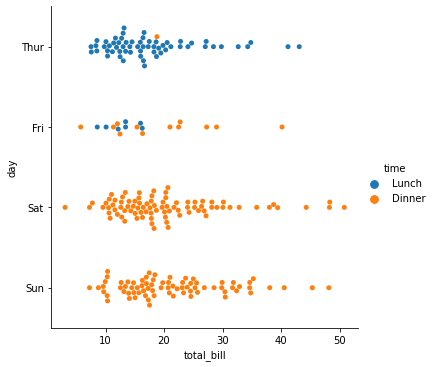

In [44]:
sns.catplot(x="total_bill", y="day", hue="time", kind ="swarm", data=tips);

BE CAREFUL : the _style_ and _size_ argument won't work with _catplot()_

## Box plot


### Create graphic

When larger volumes of data need to be visualized, the point cloud has limits. The moustache box will be more suitable by allowing to visualize the distribution of each category.

For the rest, we will always use the dataset _tips_.

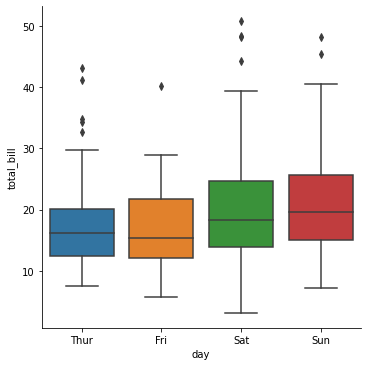

In [45]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);


### Add dimensions

In the same way, you may want to add a dimension to a box plot.


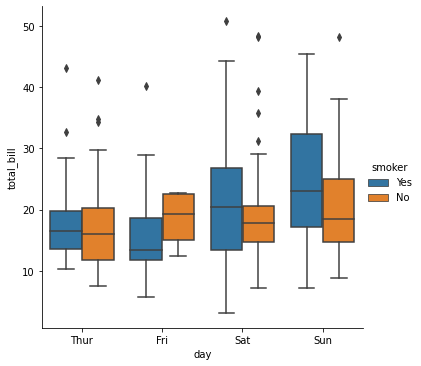

In [46]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker", data=tips);

### Optimize distribution visualization

If you need a better overview of the distribution of your categorical variables, you can use this boxplot:

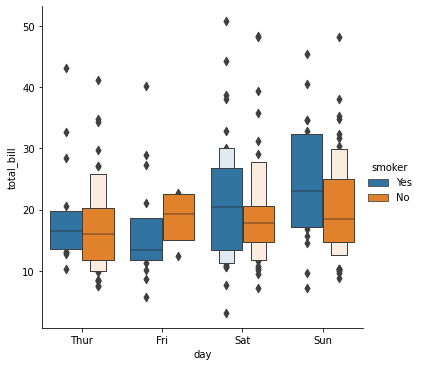

In [47]:
sns.catplot(x="day", y="total_bill", kind="boxen", hue="smoker", data=tips);

## Bar chart

To finish with categorical variables, let's use the bar chart. This time we will use the following dataset:


In [48]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Create the graph

Let's first see how we can visualize the number of people who survived among men and women. Here's how we can create a graph:


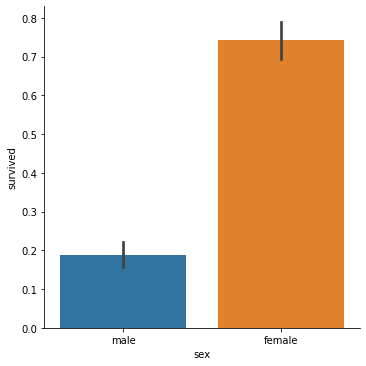

In [49]:
sns.catplot(x="sex", y="survived", kind="bar", data=titanic);

### Add a dimension

We can also add a dimension with the _hue_ parameter:


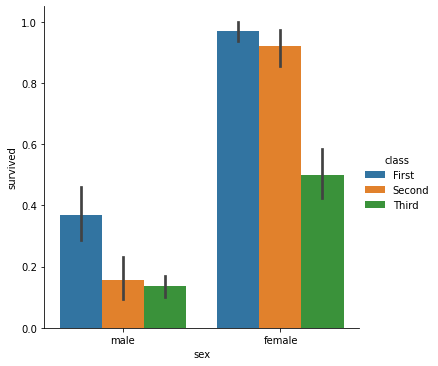

In [50]:
sns.catplot(x="sex", y="survived", kind="bar", hue="class", data=titanic);

Here we can see the class to which each person in the boat belonged.

# Visualization of linear relationships

Regressions are very good tools for creating models that are easy to understand. So let's learn how to create visualizations around this.

For the rest of the visualizations, we will use the following libraries and datasets:

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

We will use the ```lmplot()``` function

## Simple linear regression

To visualise a linear regression, nothing could be simpler:


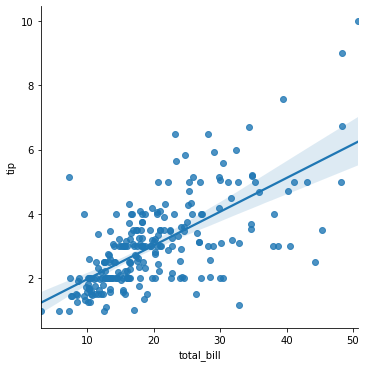

In [52]:
sns.lmplot(x="total_bill", y="tip", data=tips);

## Multiple Linear Regression

If you want to view several linear regressions at the same time according to categories, you can add the parameter _hue_.


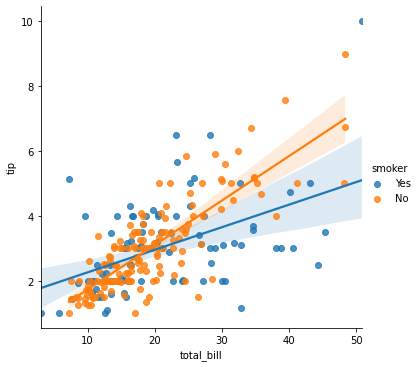

In [53]:
sns.lmplot(x="total_bill", y="tip", hue="smoker" ,data=tips);

Here, for example, we can see that smokers have a lower tendency to give a large tip in relation to the amount of the bill.

## Logistic Regression

To visualise a logisitic regression, nothing could simpler. You juste have to add the _logisitic = True_ paramaeter

For the demonstration, we will use the dataset in the *Data Sources folder: Social_Network_Ads.csv*.


In [54]:
url = "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+Visualisation/Social_Network_Ads.csv"

social_network_ads = pd.read_csv(url)

In [55]:
social_network_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


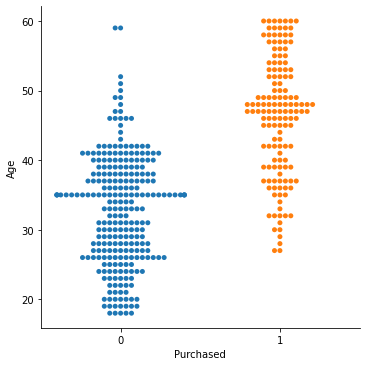

In [56]:
sns.catplot(y="Age", x="Purchased", kind="swarm", data = social_network_ads);

### <font color='blus'>Représentation de la fonction logistique</font>

![](./Img/Logistic-curve.png)

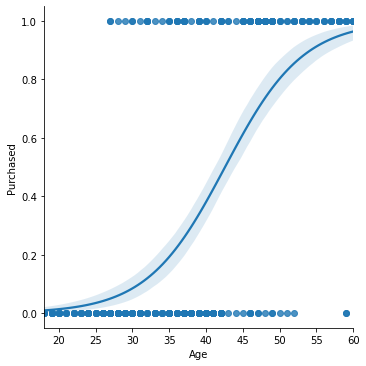

In [66]:
sns.lmplot(x="Age", y="Purchased", data=social_network_ads, logistic=True);

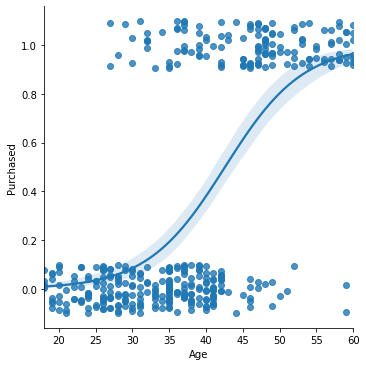

In [57]:
sns.lmplot(x="Age", y="Purchased", data=social_network_ads, logistic=True, y_jitter=.1);

# Matrices visualisation (heatmap)

To finish this course, there is one last type of visualization that it is interesting to master: _heatmaps_. This allows you to see the correlation between the variables and thus select the variables you want to put in your model.

For this demonstration, we will use the dataset : _50_Startups.csv_ in the _Data Sources_ folder.

**Principe de la corrélation entre deux variables**
>
> * Ce concept s'applique aux variables quantitatives
>
> * Chacune des variables a une variance, ie, une mesure de sa dispersion autour de la valeur moyenne.
>
> * La covariance mesure la variance partagée entre deux variables quantitatives.
>
> * La correlation est la covariance standardisée, ie ramenée à l'intervalle $[0,1]$

In [58]:
url = "https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+Visualisation/50_Startups.csv"

startups = pd.read_csv(url)

In [59]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [60]:
#help(startups.corr)

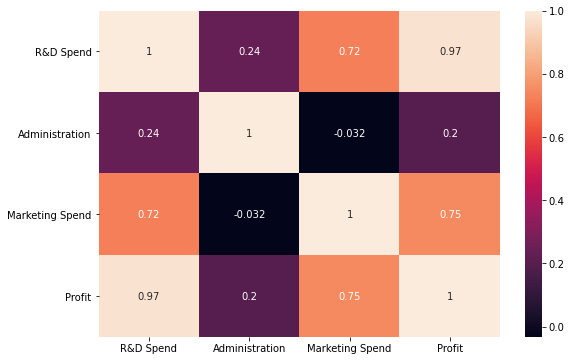

In [61]:
corr = startups.corr() # create  correlation matrix
f, ax = plt.subplots(figsize=(9, 6)) # create a "sheet" to have bigger graph
sns.heatmap(corr, annot=True, ax=ax);

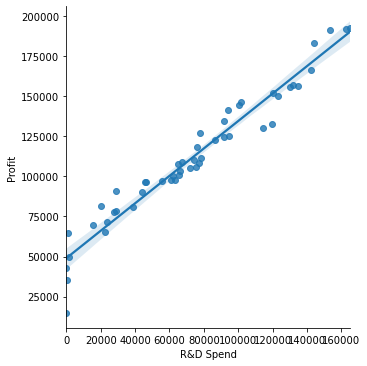

In [62]:
sns.lmplot(x="R&D Spend", y="Profit", data=startups);

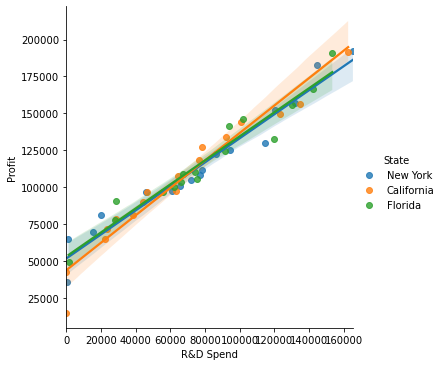

In [63]:
sns.lmplot(x="R&D Spend", y="Profit", data=startups, hue="State");

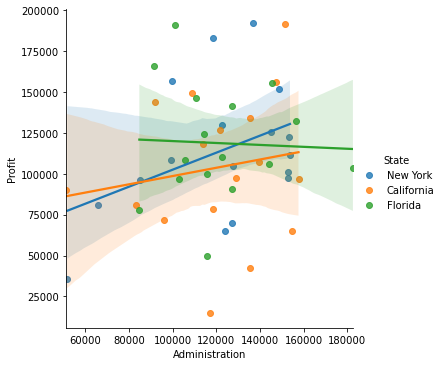

In [64]:
sns.lmplot(x="Administration", y="Profit", data=startups, hue="State");

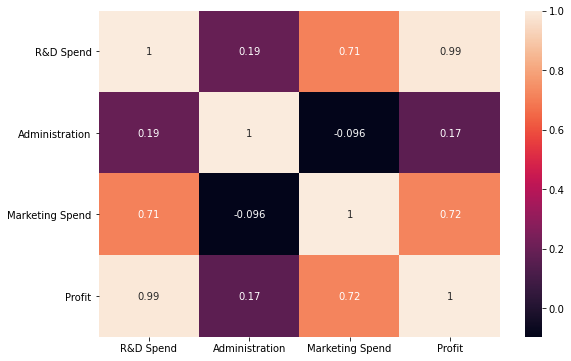

In [65]:
corr = startups.corr(method="spearman") # create  correlation matrix
f, ax = plt.subplots(figsize=(9, 6)) # create a "sheet" to have bigger graph
sns.heatmap(corr, annot=True, ax=ax);

Here you can see right away that R&D spending has an extremely strong influence on the profit of every startup.

# Ressources

Statistics visualisation - [https://bit.ly/2q4nabX](https://seaborn.pydata.org/tutorial/relational.html)

Categorical variables visualisation - [https://bit.ly/2q4n3A](https://seaborn.pydata.org/tutorial/categorical.html)

Distribution visualisation - [https://bit.ly/AZJSKn](https://seaborn.pydata.org/tutorial/distributions.html)

Regression visualisation - [https://bit.ly/2qkljsdalje](https://seaborn.pydata.org/tutorial/regression.html)

Create a heatmap - [https://bit.ly/2q4zdaskj](https://seaborn.pydata.org/examples/heatmap_annotation.html)

Kernel Density Estimator - [https://bit.ly/2q4n3SA](https://mathisonian.github.io/kde/)
